In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read the file
df = pd.read_csv('economic_index.csv')

In [8]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               24 non-null     int64  
 1   month              24 non-null     int64  
 2   interest_rate      24 non-null     float64
 3   unemployment_rate  24 non-null     float64
 4   index_price        24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


In [13]:
df.describe()

,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.00000,24.000000
mean,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,0.510754,3.526299,0.349527,0.33002,210.735341
min,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,2017.000000,12.000000,2.750000,6.20000,1464.000000


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'interest_rate'}>,
        <Axes: title={'center': 'unemployment_rate'}>],
       [<Axes: title={'center': 'index_price'}>, <Axes: >]], dtype=object)

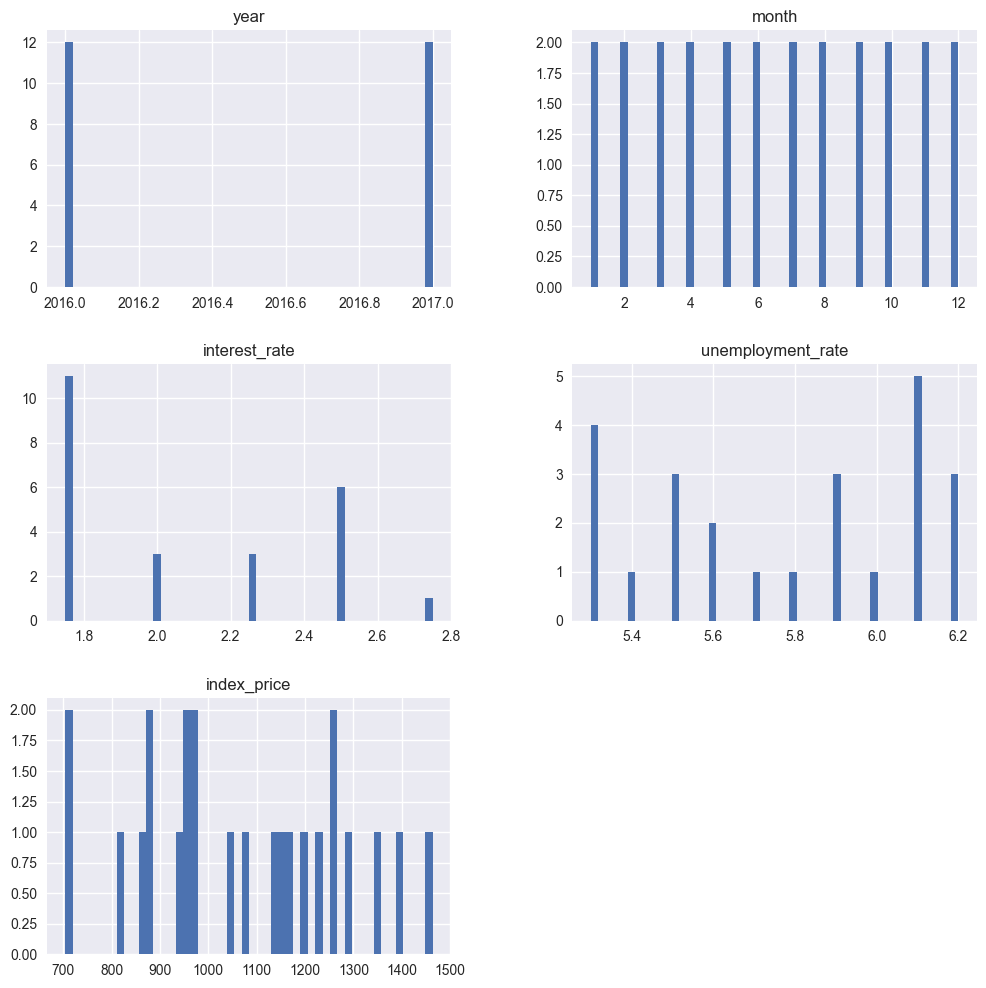

In [24]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50, figsize=(12,12))

In [25]:
df.corr()

,year,month,interest_rate,unemployment_rate,index_price
year,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


<Axes: >

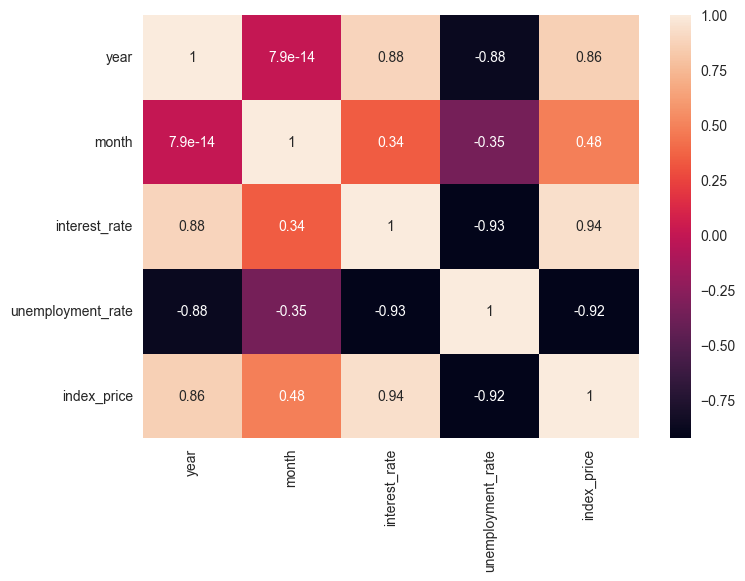

In [28]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='year', ylabel='interest_rate'>

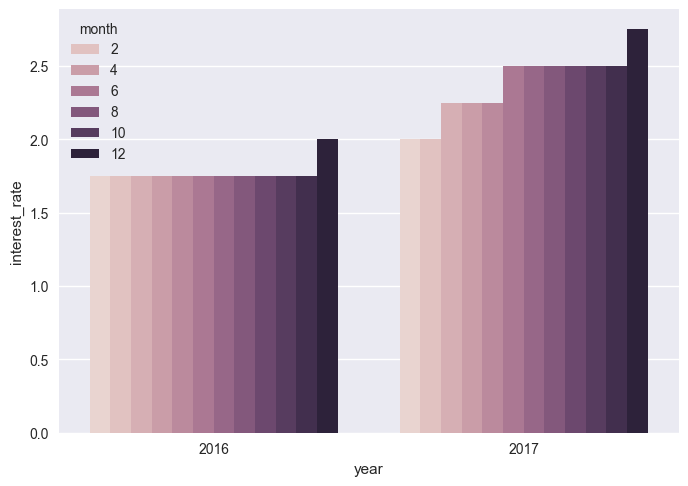

In [33]:
sns.barplot(data=df, x='year', y='interest_rate', hue='month')

In [35]:
# Feature Engineering

df.drop(columns=['year','month'], axis=1, inplace=True)

In [45]:
X = df.iloc[:,0:2]
y = df.iloc[:,2:3]

In [47]:
from sklearn.model_selection import train_test_split

x_tain, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_tain = scalar.fit_transform(x_tain)
x_test = scalar.transform(x_test)

In [54]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(n_jobs=-1)

In [55]:
LR.fit(x_tain,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [60]:
y_pred = LR.predict(x_tain)

In [63]:
from sklearn.metrics import r2_score

r2score = r2_score(y_true=y_train, y_pred=y_pred)

r2score

0.9030782287244159